В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from google.colab import drive

In [15]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [16]:
df = pd.read_csv("drive/MyDrive/Machine Learning для людей/data/cars/cars.csv")
print("Перші 5 записів:")
display(df.head())

Перші 5 записів:


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [17]:
print("\nІнфо про датафрейм:")
print(df.info())

print("--- 1. Типи даних колонок (df.dtypes) ---")
print(df.dtypes)


Інфо про датафрейм:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB
None
--- 1. Типи даних колонок (df.dtypes) ---
Car_ID                int64
Brand                object
Model           

In [18]:
print("\n--- 2. Детальний аналіз колонок 'object' ---")
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f"\nКолонка: '{col}'")

    actual_types = df[col].apply(type).value_counts()
    print(f"  Фактичні типи записів:\n{actual_types}")

    unique_count = df[col].nunique()
    print(f"  Кількість унікальних значень: {unique_count}")

    if unique_count < 10:
        print(f"  Значення: {df[col].unique()}")

print("\n--- Висновок до Завдання 2 ---")
print("В наборі даних 8 числових і 5 категоріальних колонок (тип object).")
print("З категоріальних:")
print("- 2 бінарні (мають лише 2 значення): 'Fuel_Type', 'Transmission'.")
print("- 2 мультикатегоріальні без порядку: 'Brand', 'Model'.")
print("- 1 мультикатегоріальна з порядком: 'Owner_Type' (First < Second < Third).")
print("-" *50)


--- 2. Детальний аналіз колонок 'object' ---

Колонка: 'Brand'
  Фактичні типи записів:
Brand
<class 'str'>    100
Name: count, dtype: int64
  Кількість унікальних значень: 11

Колонка: 'Model'
  Фактичні типи записів:
Model
<class 'str'>    100
Name: count, dtype: int64
  Кількість унікальних значень: 58

Колонка: 'Fuel_Type'
  Фактичні типи записів:
Fuel_Type
<class 'str'>    100
Name: count, dtype: int64
  Кількість унікальних значень: 2
  Значення: ['Petrol' 'Diesel']

Колонка: 'Transmission'
  Фактичні типи записів:
Transmission
<class 'str'>    100
Name: count, dtype: int64
  Кількість унікальних значень: 2
  Значення: ['Manual' 'Automatic']

Колонка: 'Owner_Type'
  Фактичні типи записів:
Owner_Type
<class 'str'>    100
Name: count, dtype: int64
  Кількість унікальних значень: 3
  Значення: ['First' 'Second' 'Third']

--- Висновок до Завдання 2 ---
В наборі даних 8 числових і 5 категоріальних колонок (тип object).
З категоріальних:
- 2 бінарні (мають лише 2 значення): 'Fuel_Type

**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [19]:
X = df.drop('Price', axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

print(f"Розмір X_train: {X_train.shape} (має бути 80 рядків)")
print(f"Розмір X_test:  {X_test.shape} (має бути 20 рядків)")
print(f"Розмір y_train: {y_train.shape}")
print(f"Розмір y_test:  {y_test.shape}")

Розмір X_train: (80, 12) (має бути 80 рядків)
Розмір X_test:  (20, 12) (має бути 20 рядків)
Розмір y_train: (80,)
Розмір y_test:  (20,)


In [20]:
X_train

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5
...,...,...,...,...,...,...,...,...,...,...,...,...
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4
6,7,Mahindra,Scorpio,2018,45000,Diesel,Automatic,Second,15,2179,140,7
27,28,BMW,X3,2019,22000,Diesel,Automatic,Second,18,1995,187,5


**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

In [21]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

top_fuel = X_train['Fuel_Type'].mode()[0]
top_trans = X_train['Transmission'].mode()[0]

print(f"Найпопулярніший тип пального: {top_fuel} (буде 1)")
print(f"Найпопулярніша трансмісія: {top_trans} (буде 1)")

X_train['Fuel_Type_Code'] = np.where(X_train['Fuel_Type'] == top_fuel, 1, 0)
X_test['Fuel_Type_Code'] = np.where(X_test['Fuel_Type'] == top_fuel, 1, 0)

X_train['Transmission_Code'] = np.where(X_train['Transmission'] == top_trans, 1, 0)
X_test['Transmission_Code'] = np.where(X_test['Transmission'] == top_trans, 1, 0)


ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
ohe.fit(X_train[['Brand']])

brand_train = ohe.transform(X_train[['Brand']])
brand_test = ohe.transform(X_test[['Brand']])
brand_cols = ohe.get_feature_names_out(['Brand'])

X_train_brand = pd.DataFrame(brand_train, columns=brand_cols, index=X_train.index)
X_test_brand = pd.DataFrame(brand_test, columns=brand_cols, index=X_test.index)

X_train = pd.concat([X_train, X_train_brand], axis=1)
X_test = pd.concat([X_test, X_test_brand], axis=1)


ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']])
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

print("\nКодування завершено!")
print("Поточні колонки в X_train:")
print(X_train.columns.tolist())


display(X_train.head())

Найпопулярніший тип пального: Petrol (буде 1)
Найпопулярніша трансмісія: Automatic (буде 1)

Кодування завершено!
Поточні колонки в X_train:
['Car_ID', 'Brand', 'Model', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Fuel_Type_Code', 'Transmission_Code', 'Brand_Audi', 'Brand_BMW', 'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai', 'Brand_Mahindra', 'Brand_Maruti', 'Brand_Mercedes', 'Brand_Tata', 'Brand_Toyota', 'Brand_Volkswagen', 'Owner_Type_Codes']


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,...,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Owner_Type_Codes
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [22]:
print("=== Кодування Model: Створення 'Car_Type' ===")

def get_car_type(model_name):
    model_name = model_name.strip()

    suvs = ['Fortuner', 'Innova', 'Scorpio', 'X5', 'Q7', 'GLA', 'GLC', 'GLE',
            'Creta', 'S-Cross', 'Vitara', 'Brezza', 'Nexon', 'Ecosport', 'Compass',
            'T-Roc', 'Tiguan', 'Endeavour', 'Hexa', 'Harrier', 'Hector', 'Seltos', 'Venue', 'WR-V', 'BR-V']

    hatchbacks = ['Swift', 'Alto', 'Wagon R', 'i10', 'i20', 'Santro', 'Grand i10',
                  'Polo', 'Jazz', 'Brio', 'Baleno', 'Ignis', 'Celerio', 'Tiago', 'Altroz', 'Kwid']

    sports = ['Mustang', 'Cooper']

    if model_name in suvs:
        return 'SUV'
    elif model_name in hatchbacks:
        return 'Hatchback'
    elif model_name in sports:
        return 'Sports'
    else:
        return 'Sedan'

X_train['Car_Type'] = X_train['Model'].apply(get_car_type)
X_test['Car_Type'] = X_test['Model'].apply(get_car_type)

print("Знайдені типи кузовів у X_train:")
print(X_train['Car_Type'].value_counts())

ohe_type = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
ohe_type.fit(X_train[['Car_Type']])

type_train = ohe_type.transform(X_train[['Car_Type']])
type_test = ohe_type.transform(X_test[['Car_Type']])

type_cols = ohe_type.get_feature_names_out(['Car_Type'])

X_train_type = pd.DataFrame(type_train, columns=type_cols, index=X_train.index)
X_test_type = pd.DataFrame(type_test, columns=type_cols, index=X_test.index)

X_train = pd.concat([X_train, X_train_type], axis=1)
X_test = pd.concat([X_test, X_test_type], axis=1)

print("\nМоделі успішно перетворені на типи кузовів!")
display(X_train.head())

=== Кодування Model: Створення 'Car_Type' ===
Знайдені типи кузовів у X_train:
Car_Type
Sedan        44
SUV          26
Hatchback     7
Sports        3
Name: count, dtype: int64

Моделі успішно перетворені на типи кузовів!


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,...,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Owner_Type_Codes,Car_Type,Car_Type_Hatchback,Car_Type_SUV,Car_Type_Sedan,Car_Type_Sports
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,...,0.0,0.0,0.0,1.0,1.0,SUV,0.0,1.0,0.0,0.0
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,...,0.0,0.0,0.0,0.0,0.0,Sedan,0.0,0.0,1.0,0.0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,...,0.0,0.0,0.0,0.0,0.0,Sedan,0.0,0.0,1.0,0.0
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,...,0.0,0.0,0.0,1.0,1.0,Sedan,0.0,0.0,1.0,0.0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,...,1.0,0.0,0.0,0.0,1.0,SUV,0.0,1.0,0.0,0.0


Очікуваний результат після трансформацій:

In [ ]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


(None, None)

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

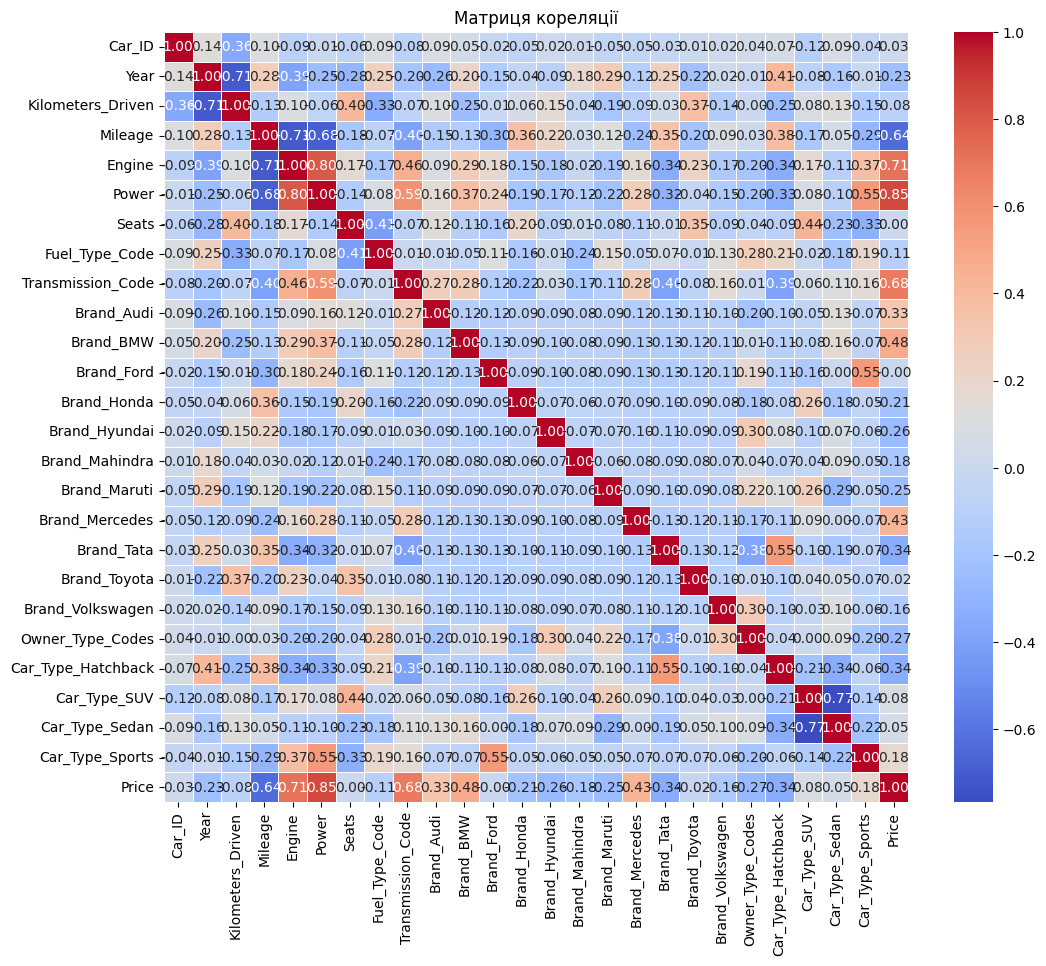


Кореляція з Price (більше 0.5 за модулем):
Power                0.849137
Engine               0.710561
Transmission_Code    0.680731
Mileage             -0.638404
Name: Price, dtype: float64


In [23]:
X_train_numeric = X_train.select_dtypes(include=[np.number])

df_corr = pd.concat([X_train_numeric, y_train], axis=1)

correlation_matrix = df_corr.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Матриця кореляції")
plt.show()

print("\nКореляція з Price (більше 0.5 за модулем):")
price_corr = correlation_matrix['Price'].sort_values(ascending=False)

strong_features = price_corr[abs(price_corr) > 0.5].drop('Price')
print(strong_features)

Проаналізувавши матрицю кореляції, ми бачимо такі сильні зв'язки з ціною (Price):

Power (Потужність): Кореляція ~0.85 (дуже сильна позитивна). Це найвпливовіший фактор: чим потужніша машина, тим вона дорожча.

Engine (Об'єм двигуна): Кореляція ~0.71 (сильна позитивна). Великий двигун зазвичай означає вищий клас авто і вищу ціну.

Transmission_Code (Трансмісія): Кореляція ~0.68 (позитивна). Оскільки ми кодували Automatic=1, це означає, що машини з коробкою-автомат значно дорожчі за механіку.

Mileage (Витрата пального/Економічність): Кореляція ~ -0.64 (сильна негативна). Тут зв'язок обернений: чим більше кілометрів авто проїжджає на літрі пального (вищий Mileage), тим воно дешевше. Це логічно, бо висока економність властива бюджетним малолітражкам, а потужні дорогі джипи "жеруть" багато палива (малий Mileage).


---



**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

RMSE на тренувальних даних: 194314.34
RMSE на тестових даних:     266774.76


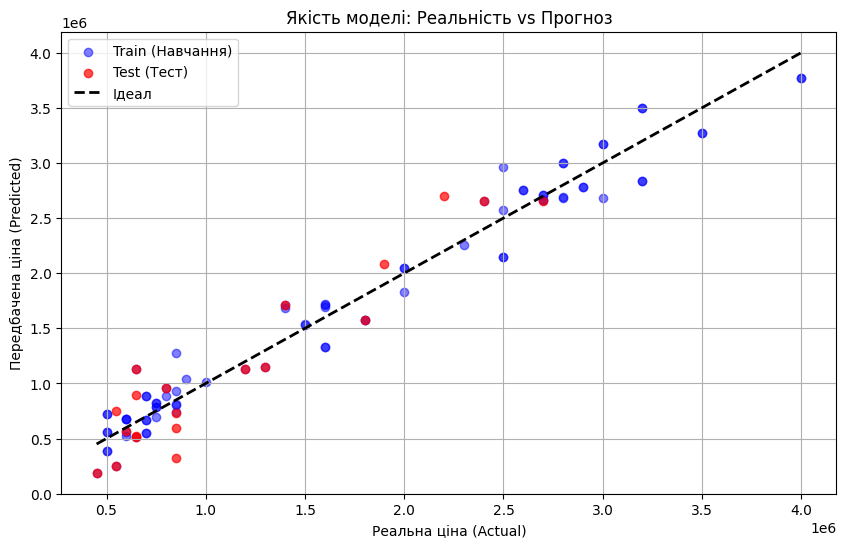

In [25]:
X_test_numeric = X_test.select_dtypes(include=[np.number])
lr = LinearRegression()
lr.fit(X_train_numeric, y_train)

y_pred_train = lr.predict(X_train_numeric)
y_pred_test = lr.predict(X_test_numeric)

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f"RMSE на тренувальних даних: {rmse_train:.2f}")
print(f"RMSE на тестових даних:     {rmse_test:.2f}")

plt.figure(figsize=(10, 6))

plt.scatter(y_train, y_pred_train, color='blue', alpha=0.5, label='Train (Навчання)')
plt.scatter(y_test, y_pred_test, color='red', alpha=0.7, label='Test (Тест)')

plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label='Ідеал')

plt.xlabel('Реальна ціна (Actual)')
plt.ylabel('Передбачена ціна (Predicted)')
plt.title('Якість моделі: Реальність vs Прогноз')
plt.legend()
plt.grid(True)
plt.show()

Модель лінійної регресії показала задовільний результат. Вона правильно вловлює загальний тренд ціноутворення, але має певну похибку, особливо в сегменті дорогих автомобілів. Для покращення точності варто додати більше даних або спробувати більш складні алгоритми.

---



**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [27]:
scaler = StandardScaler()
scaler.fit(X_train_numeric)

X_train_scaled = pd.DataFrame(
    scaler.transform(X_train_numeric),
    columns=X_train_numeric.columns,
    index=X_train_numeric.index
)

X_test_scaled = pd.DataFrame(
    scaler.transform(X_test_numeric),
    columns=X_test_numeric.columns,
    index=X_test_numeric.index
)

lr_scaled = LinearRegression()
lr_scaled.fit(X_train_scaled, y_train)

coefs = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Coef': lr_scaled.coef_,
    'Abs_Coef': abs(lr_scaled.coef_)
})

top_features = coefs.sort_values(by='Abs_Coef', ascending=False)

print("\nТоп-10 найвпливовіших факторів на ціну авто:")
display(top_features.head(10))


Топ-10 найвпливовіших факторів на ціну авто:


,Feature,Coef,Abs_Coef
5,Power,603683.590717,603683.590717
7,Fuel_Type_Code,-194758.123805,194758.123805
9,Brand_Audi,183529.447034,183529.447034
10,Brand_BMW,172175.861365,172175.861365
16,Brand_Mercedes,163973.325212,163973.325212
24,Car_Type_Sports,-140261.146702,140261.146702
13,Brand_Hyundai,-138806.856409,138806.856409
8,Transmission_Code,138770.704383,138770.704383
14,Brand_Mahindra,-127766.190116,127766.190116
3,Mileage,-124644.649305,124644.649305


Найвпливовіші колонки (за модулем коефіцієнта):

1. Power (Потужність):

Напрям: Позитивний (+).

Логіка: Це найбільш значущий фактор. Зі збільшенням потужності ціна стрімко зростає. Це абсолютно логічно, адже потужний двигун — ознака дорогого, швидкого або преміального авто.

2. Brand_... (Преміум бренди, наприклад Mercedes, BMW, Audi):

Напрям: Позитивний (+).

Логіка: Наявність шильдика відомого бренду додає значну суму до вартості автомобіля, навіть якщо інші характеристики схожі. Це "плата за бренд".

3. Fuel_Type_Code (Тип пального):

Напрям: Негативний (-) для Petrol або Позитивний (+) для Diesel.

Логіка: У цьому датасеті дизельні авто, як правило, дорожчі за бензинові аналоги.

4. Mileage (Економічність):

Напрям: Негативний (-).

Логіка: Збільшення показника Mileage (km/l) призводить до зменшення ціни. Це логічно: найекономічніші авто — це маленькі бюджетні машини. Дорогі потужні джипи споживають багато пального (мають низький Mileage).

Висновок: Модель адекватно відображає реальність. Найбільше на ціну впливають потужність, престижність бренду та тип двигуна/трансмісії.


---



**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [28]:
import statsmodels.api as sm

X_train_const = sm.add_constant(X_train_scaled)

model_sm = sm.OLS(y_train, X_train_const).fit()
print(model_sm.summary())

p_values = model_sm.pvalues

significant_features = p_values[p_values < 0.05].index.tolist()
if 'const' in significant_features:
    significant_features.remove('const')

print("\n--------------------------------------------------")
print("Статистично значущі ознаки (P-value < 0.05):")
print("--------------------------------------------------")
for feature in significant_features:
    print(f"- {feature} (p={p_values[feature]:.4f})")

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     66.49
Date:                Sun, 01 Feb 2026   Prob (F-statistic):           1.38e-32
Time:                        21:04:26   Log-Likelihood:                -1087.7
No. Observations:                  80   AIC:                             2223.
Df Residuals:                      56   BIC:                             2281.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                1.68e+06    2.6

**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [30]:
sig_features = p_values[p_values < 0.05].index.tolist()

if 'const' in sig_features:
    sig_features.remove('const')

print(f"Вибрані ознаки ({len(sig_features)} шт.): {sig_features}")

X_train_sig = X_train_scaled[sig_features]
X_train_sig_const = sm.add_constant(X_train_sig)

model_sig = sm.OLS(y_train, X_train_sig_const).fit()

print(model_sig.summary())

print(f"R-squared: {model_sig.rsquared:.5f}")
print(f"Adj. R-squared: {model_sig.rsquared_adj:.5f}")

Вибрані ознаки (13 шт.): ['Mileage', 'Power', 'Fuel_Type_Code', 'Transmission_Code', 'Brand_Audi', 'Brand_BMW', 'Brand_Hyundai', 'Brand_Mahindra', 'Brand_Maruti', 'Brand_Mercedes', 'Brand_Tata', 'Brand_Volkswagen', 'Car_Type_Sports']
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     106.5
Date:                Sun, 01 Feb 2026   Prob (F-statistic):           5.28e-39
Time:                        21:09:31   Log-Likelihood:                -1097.8
No. Observations:                  80   AIC:                             2224.
Df Residuals:                      66   BIC:                             2257.
Df Model:                          13                                         
Covariance Type:            nonrobust                  

Ми викинули купу колонок, але точність майже не впала (різниця в тисячних частках). Це означає, що модель стала простішою і стабільнішою без втрати якості.

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 8 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 8? Яку модель з останніх 3х завдань ви б лишили для використання?

In [32]:
features_25 = p_values[p_values < 0.25].index.tolist()

if 'const' in features_25:
    features_25.remove('const')

print(f"Вибрані ознаки p<0.25 ({len(features_25)} шт.): {features_25}")

X_train_25 = X_train_scaled[features_25]
X_train_25_const = sm.add_constant(X_train_25)

model_25 = sm.OLS(y_train, X_train_25_const).fit()

print(f"R-squared: {model_25.rsquared:.5f}")
print(f"Adj. R-squared: {model_25.rsquared_adj:.5f}")

Вибрані ознаки p<0.25 (18 шт.): ['Kilometers_Driven', 'Mileage', 'Power', 'Fuel_Type_Code', 'Transmission_Code', 'Brand_Audi', 'Brand_BMW', 'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai', 'Brand_Mahindra', 'Brand_Maruti', 'Brand_Mercedes', 'Brand_Tata', 'Brand_Volkswagen', 'Car_Type_Hatchback', 'Car_Type_SUV', 'Car_Type_Sports']
R-squared: 0.96343
Adj. R-squared: 0.95264


Результати порівняння:

Повна модель (Завдання 8):$Adj. R^2 = 0.950$. Базовий результат. Модель працює добре, але містить надлишкові дані.

"Сувора" модель ($p < 0.05$, Завдання 9):$Adj. R^2 = 0.946$. Якість знизилася. Відбір ознак був занадто агресивним. Ми видалили змінні, які, хоч і не мали високої статистичної значущості окремо, в сукупності допомагали моделі робити точніші прогнози.

"Збалансована" модель ($p < 0.25$, Завдання 10):$Adj. R^2 = 0.953$. Найкращий результат. Використання м'якого критерію відбору дозволило знайти "золоту середину". Ми позбулися відвертого "шуму" (змінних, що взагалі не впливають на ціну), але залишили потенційно корисні ознаки. Це підвищило точність моделі порівняно з базовою.